<a href="https://colab.research.google.com/github/almdanddre/Fotografia-Computacional---UFPE/blob/main/Processamento_de_Imagens_Coloridas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kevinruiz182/image_processing_tools.git

Cloning into 'image_processing_tools'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 122 (delta 2), reused 10 (delta 2), pack-reused 108
Receiving objects: 100% (122/122), 46.98 MiB | 17.71 MiB/s, done.
Resolving deltas: 100% (15/15), done.


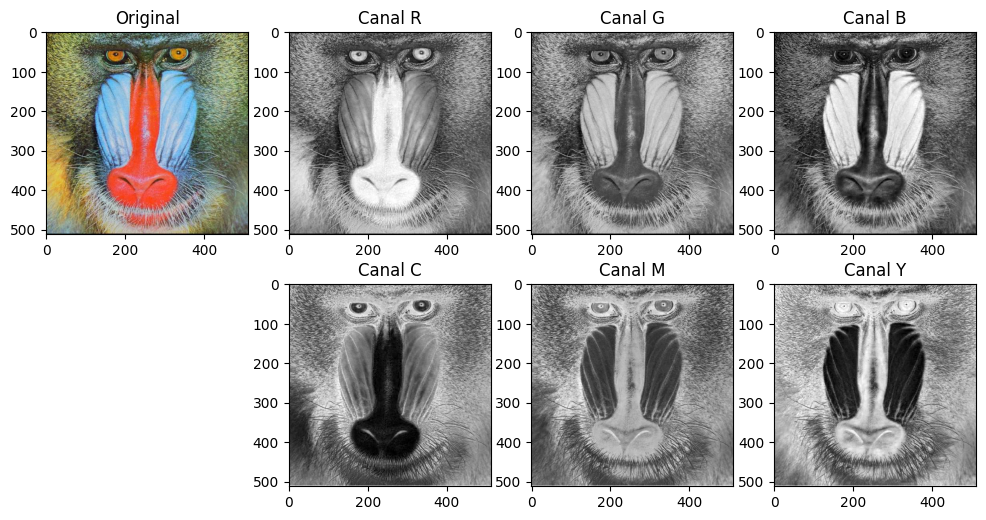

Intensidade Média - Canal R: 137.33385467529297
Intensidade Média - Canal G: 128.8556022644043
Intensidade Média - Canal B: 113.17748641967773
Intensidade Média - Canal C: 117.66614532470703
Intensidade Média - Canal M: 126.1443977355957
Intensidade Média - Canal Y: 141.82251358032227


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread("image_processing_tools/images/general/baboon.png")

# Converter a imagem de BGR para RGB
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Decompor nos canais RGB
r, g, b = cv2.split(imagem_rgb)

# Calcular a intensidade média para cada canal
intensidade_media_r = np.mean(r)
intensidade_media_g = np.mean(g)
intensidade_media_b = np.mean(b)

# Calcular os canais CMY
c = 1 - r/255.0
m = 1 - g/255.0
y = 1 - b/255.0

# Calcular os canais CMY
c = 1 - r/255.0
m = 1 - g/255.0
y = 1 - b/255.0

# Denormalizar os canais CMY (multiplicar por 255)
c *= 255
m *= 255
y *= 255

# Calcular a intensidade média para cada canal CMY
intensidade_media_c = np.mean(c)
intensidade_media_m = np.mean(m)
intensidade_media_y = np.mean(y)

# Exibir as imagens
plt.figure(figsize=(12, 6))

plt.subplot(2, 4, 1)
plt.imshow(imagem_rgb)
plt.title("Original")

plt.subplot(2, 4, 2)
plt.imshow(r, cmap='gray')
plt.title("Canal R")

plt.subplot(2, 4, 3)
plt.imshow(g, cmap='gray')
plt.title("Canal G")

plt.subplot(2, 4, 4)
plt.imshow(b, cmap='gray')
plt.title("Canal B")

plt.subplot(2, 4, 6)
plt.imshow(c, cmap='gray')  # Adicionando cmap='gray'
plt.title("Canal C")

plt.subplot(2, 4, 7)
plt.imshow(m, cmap='gray')  # Adicionando cmap='gray'
plt.title("Canal M")

plt.subplot(2, 4, 8)
plt.imshow(y, cmap='gray')  # Adicionando cmap='gray'
plt.title("Canal Y")

plt.show()

# Imprimir intensidades médias
print("Intensidade Média - Canal R:", intensidade_media_r)
print("Intensidade Média - Canal G:", intensidade_media_g)
print("Intensidade Média - Canal B:", intensidade_media_b)
print("Intensidade Média - Canal C:", intensidade_media_c)
print("Intensidade Média - Canal M:", intensidade_media_m)
print("Intensidade Média - Canal Y:", intensidade_media_y)

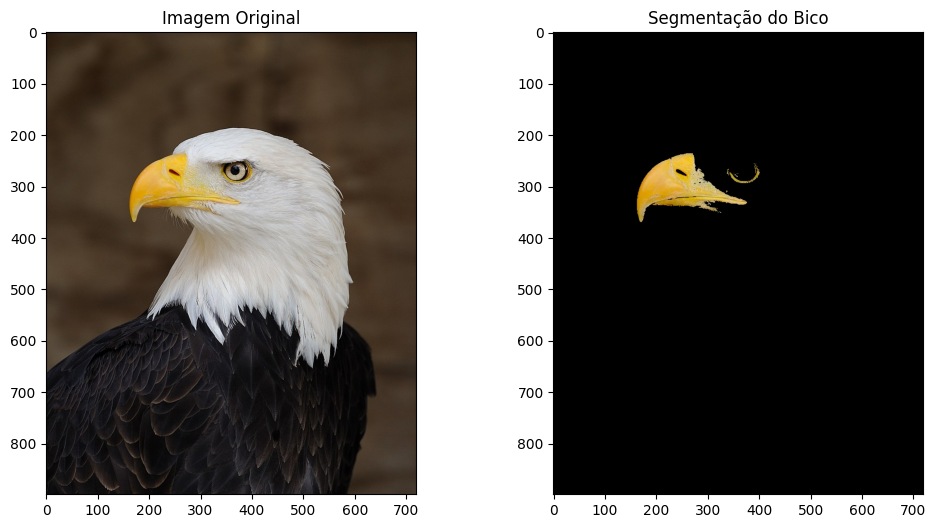

Média dos valores de distância: 123.38045956921472


In [4]:
# Carregar a imagem
imagem = cv2.imread("/content/image_processing_tools/images/color_image_processing/bald_eagle_portrait.jpg")

# Converter a imagem de BGR para RGB
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Definir a cor amarela (255, 255, 0)
cor_amarela = np.array([255, 255, 0])

# Calcular a distância euclidiana entre cada pixel e a cor amarela
distancias = np.sqrt(np.sum((imagem_rgb - cor_amarela) ** 2, axis=-1))

# Definir o limiar de distância
limiar_distancia = np.sqrt(np.sum((np.array([0, 0, 0]) - np.array([100, 100, 100])) ** 2))

# Criar uma máscara baseada no limiar de distância
mascara = distancias < limiar_distancia

# Aplicar a máscara na imagem original
segmentacao = np.zeros_like(imagem_rgb)
segmentacao[mascara] = imagem_rgb[mascara]

# Exibir a imagem original e a segmentação
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagem_rgb)
plt.title("Imagem Original")

plt.subplot(1, 2, 2)
plt.imshow(segmentacao)
plt.title("Segmentação do Bico")

plt.show()

# Calcular a média dos valores de distância dos pixels dentro da região de limiar
media_distancia = np.mean(distancias[mascara])

# Imprimir a média aproximada
print("Média dos valores de distância:", media_distancia)

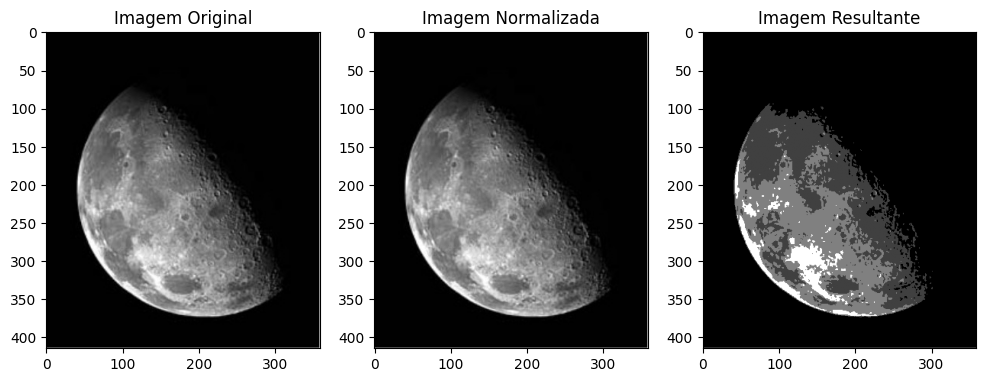

Média dos pixels sobre toda a imagem: 0.13159378460918886


In [5]:
# Carregar a imagem da lua
imagem_lua = cv2.imread("/content/image_processing_tools/images/spatial/moon.jpg")


# Somar os três canais
soma_canais = np.sum(imagem_lua, axis=-1)

# Normalizar o resultado
normalizar = lambda v: (v - v.min()) / (v.max() - v.min())
imagem_normalizada = normalizar(soma_canais)

# Aplicar as aproximações
imagem_resultante = np.zeros_like(imagem_normalizada)

imagem_resultante[imagem_normalizada < 0.25] = 0
imagem_resultante[(imagem_normalizada >= 0.25) & (imagem_normalizada < 0.5)] = 0.25
imagem_resultante[(imagem_normalizada >= 0.5) & (imagem_normalizada < 0.75)] = 0.5
imagem_resultante[imagem_normalizada >= 0.75] = 1.0

# Exibir as imagens
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagem_lua)
plt.title("Imagem Original")

plt.subplot(1, 3, 2)
plt.imshow(imagem_normalizada, cmap='gray')
plt.title("Imagem Normalizada")

plt.subplot(1, 3, 3)
plt.imshow(imagem_resultante, cmap='gray')
plt.title("Imagem Resultante")

plt.show()

# Calcular a média dos pixels sobre toda a imagem resultante
media_pixels = np.mean(imagem_resultante)

# Imprimir o valor da média
print("Média dos pixels sobre toda a imagem:", media_pixels)